In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("21-housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
def plot_all_histograms(df, title_prefix= ""):
    # df içinde type ı number olanları seçiyor.
    import math
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize= (5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True,bins=30)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()
    

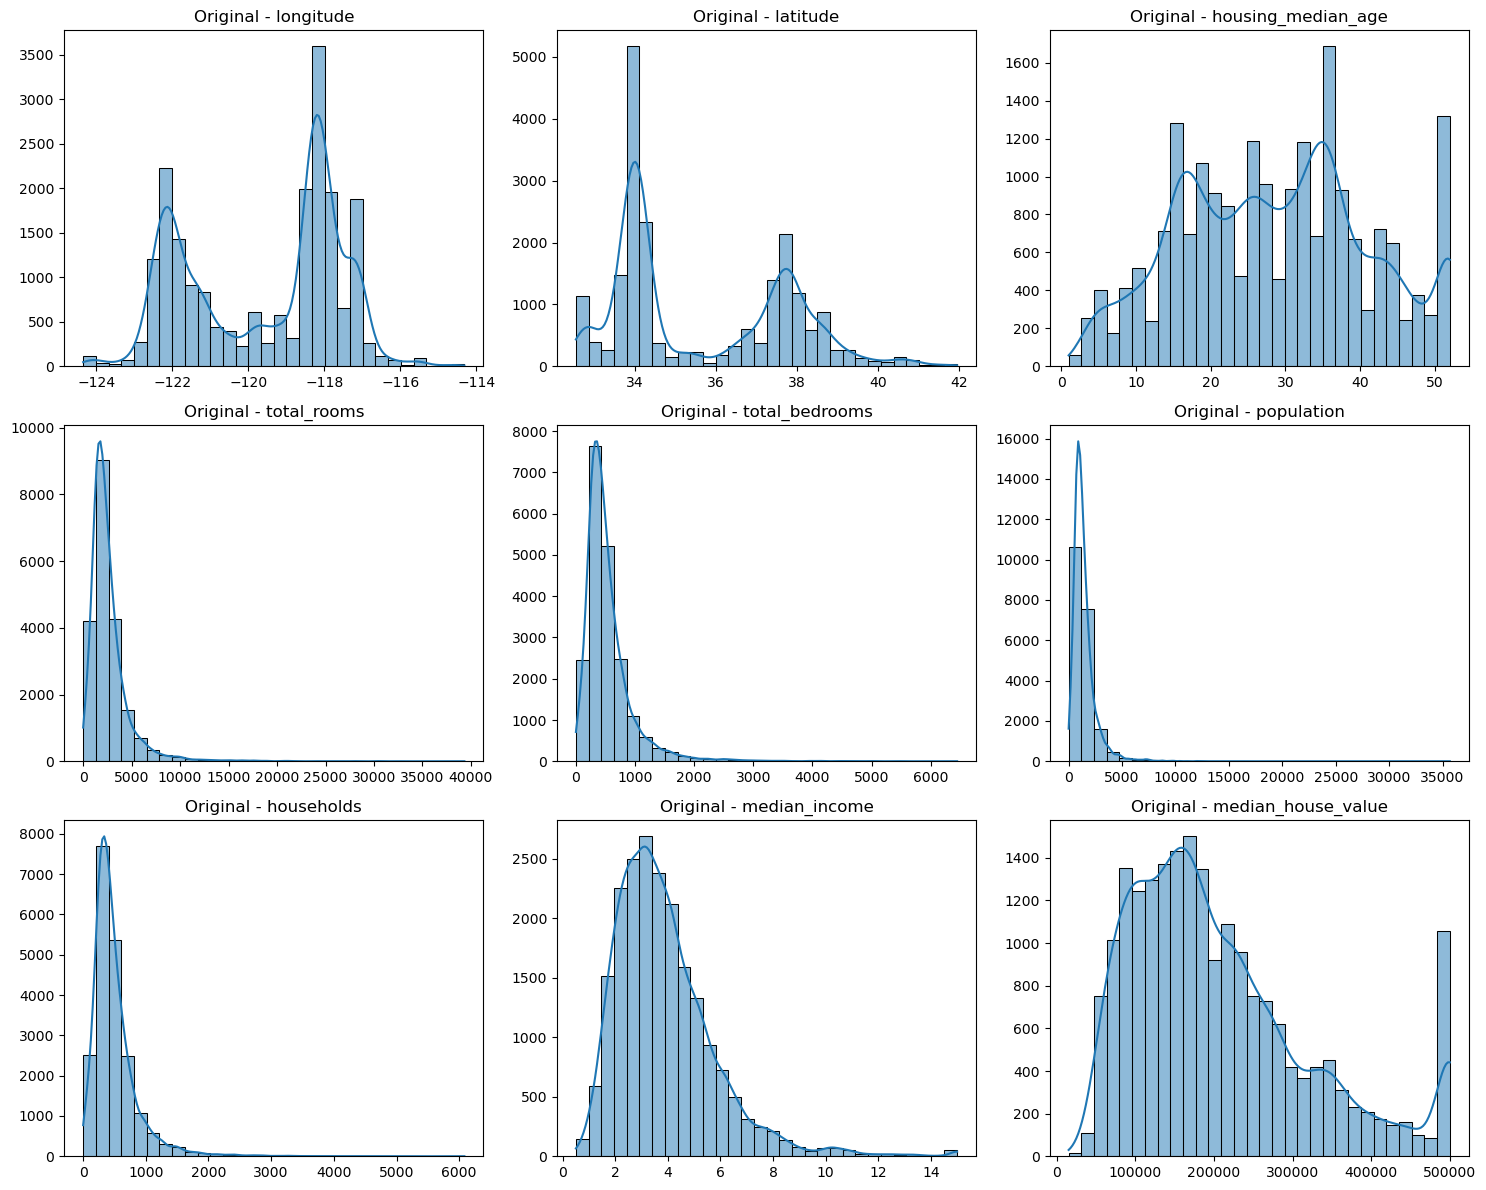

In [34]:
plot_all_histograms(df, title_prefix="Original -")

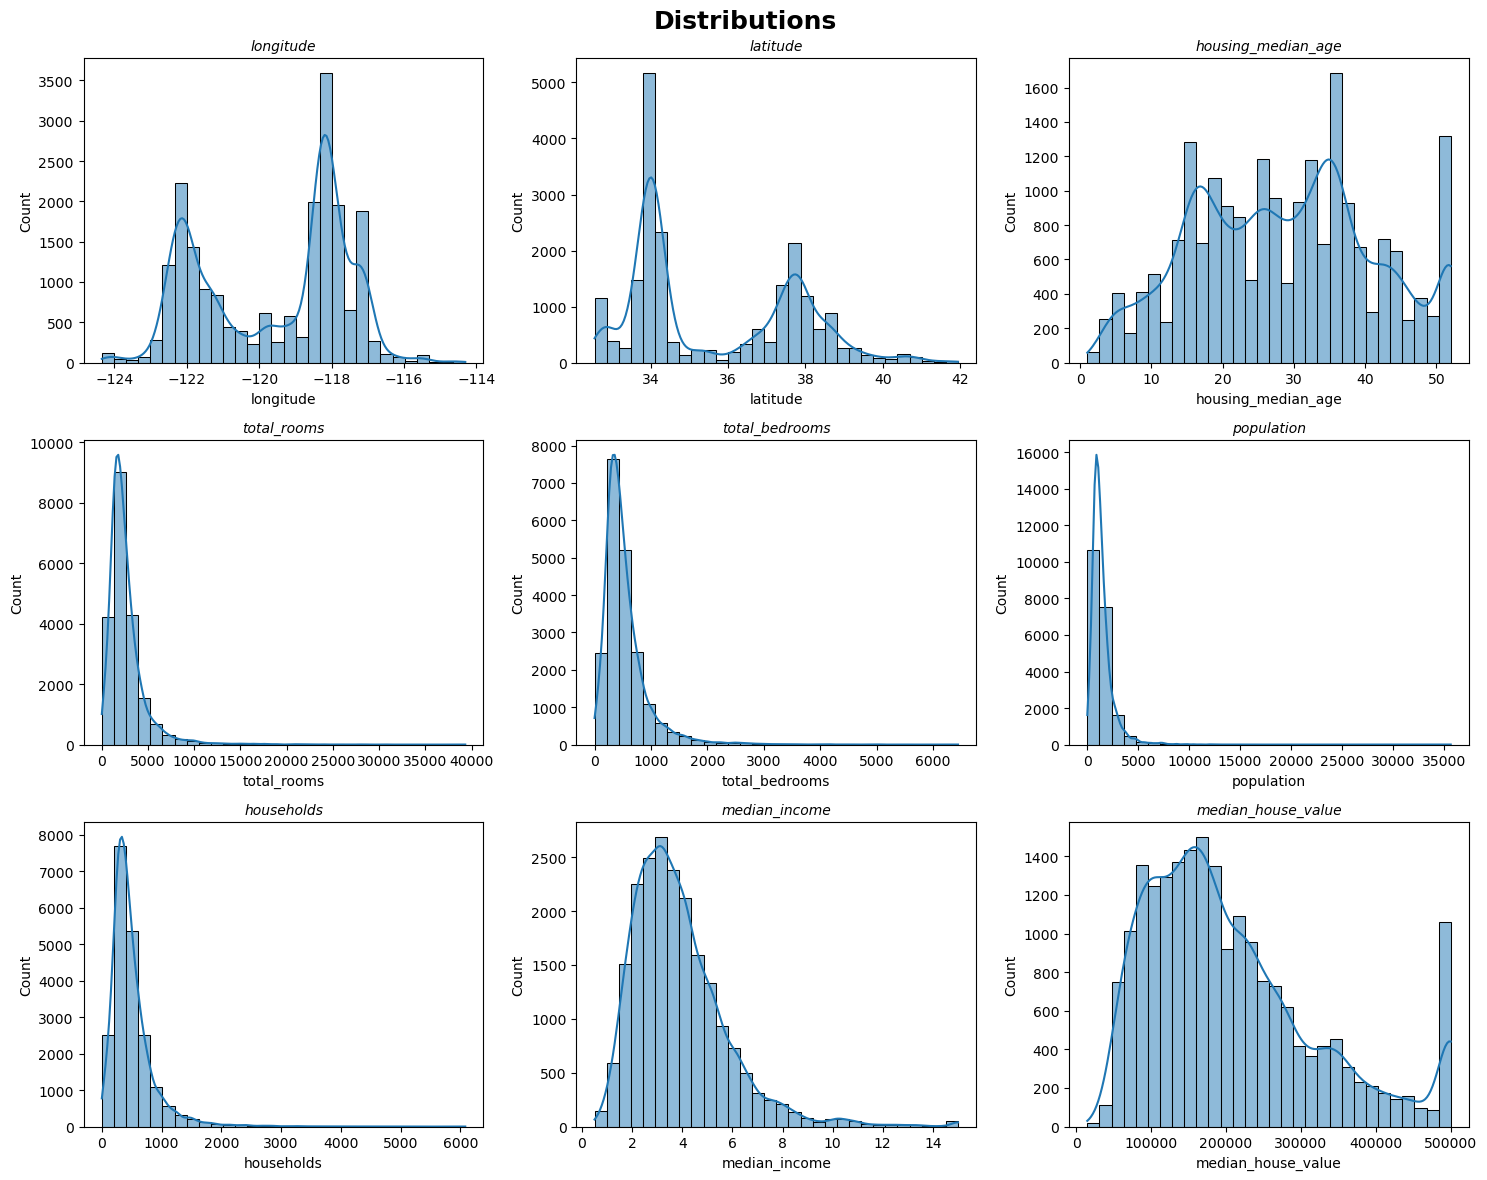

In [7]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
fig.suptitle("Distributions", fontsize=18, fontweight="bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle="italic")

plt.tight_layout()
plt.show()

In [8]:
def find_ouliers_iqr(df, threshold=1.5, q1=0.25, q3=0.75):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float", "int"]).columns
    print(numeric_cols)

    for col in numeric_cols:
        Q1 = df[col].quantile(q1)
        Q3 = df[col].quantile(q3)
        IQR = Q3- Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
        "outlier_count" : outliers.shape[0],
        "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
        "lower_bound" : lower_bound,
        "upper_bound" : upper_bound
        }

    return pd.DataFrame(outlier_summary)

def remove_outliers_from_column(df, target_col, threshold=1.5, q1=0.25, q3=0.75):
    Q1 = df[target_col].quantile(q1)
    Q3 = df[target_col].quantile(q3)
    IQR = Q3 - Q1

    lower_bound = Q1 - IQR * threshold
    upper_bound = Q3 + IQR * threshold

    return df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

def remove_outliers_from_all_columns(df, threshold, q1=0.25, q3=0.75):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float", "int"]).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(q1)
        Q3 = df_clean[col].quantile(q3)
        IQR = Q3 - Q1

        lower_bound = Q1 - IQR * threshold
        upper_bound = Q3 + IQR * threshold

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean.copy()

In [9]:
df_clean = remove_outliers_from_column(df, "median_house_value")

In [10]:
df_clean.shape

(19569, 10)

In [11]:
df_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df_clean["total_bedrooms"] = df_clean["total_bedrooms"].fillna(df_clean["total_bedrooms"].median())

C:\Users\GED\AppData\Local\Temp\ipykernel_17920\3880274364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["total_bedrooms"] = df_clean["total_bedrooms"].fillna(df_clean["total_bedrooms"].median())


In [13]:
df_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [16]:
# one hot encoding
df_clean = pd.get_dummies(df_clean, columns=["ocean_proximity"], drop_first=True)

In [17]:
df_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [28]:
df_clean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [19]:
from scipy.stats import skew # çarpıklığı ölçmeye yarıyor

In [20]:
df_clean.select_dtypes(include=["number"]).apply(skew).sort_values(ascending=False)

population            4.961787
total_rooms           4.228578
total_bedrooms        3.479223
households            3.406650
median_income         0.889306
median_house_value    0.755894
latitude              0.455656
housing_median_age    0.070466
longitude            -0.289687
dtype: float64

In [21]:
X = df_clean.drop("median_house_value", axis=1)
y = df_clean["median_house_value"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [23]:
# Transformation
from sklearn.preprocessing import PowerTransformer

In [24]:
pt_X = PowerTransformer(method="yeo-johnson")

In [25]:
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [29]:
columns_name = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']

In [30]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=columns_name)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_name)

In [31]:
X_train_transformed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.387779e-15,-0.671009,0.486589,0.050535,0.024399,0.358262,0.058133,-0.018646,1.411199,-0.014801,-0.340747,-0.375912
1,2.470246e-15,-1.204064,-0.970340,0.432472,0.522800,0.628352,0.363502,-0.940026,-0.708617,-0.014801,-0.340747,-0.375912
2,2.053913e-15,-0.721618,0.022996,0.305957,0.685602,0.800713,0.621156,-0.907275,1.411199,-0.014801,-0.340747,-0.375912
3,1.471046e-15,-0.972146,-0.296774,0.225063,0.655914,0.434484,0.557085,-0.254036,-0.708617,-0.014801,-0.340747,-0.375912
4,-2.636780e-15,1.423100,-0.056065,-0.548070,-0.448934,-0.944478,-0.697868,-2.133232,1.411199,-0.014801,-0.340747,-0.375912
...,...,...,...,...,...,...,...,...,...,...,...,...
13693,1.221245e-15,-0.696224,-0.056065,-0.355082,-0.693242,-0.593331,-0.599422,1.324302,-0.708617,-0.014801,-0.340747,-0.375912
13694,-2.275957e-15,0.937386,0.637451,0.043574,0.083895,0.721670,0.110812,-0.815634,-0.708617,-0.014801,2.934729,-0.375912
13695,4.024558e-15,-1.599035,0.179499,-1.336357,-1.128894,-0.681751,-1.090558,-1.525335,1.411199,-0.014801,-0.340747,-0.375912
13696,1.026956e-15,-0.779423,0.256983,0.340278,0.660509,0.741306,0.522974,0.058431,-0.708617,-0.014801,-0.340747,-0.375912


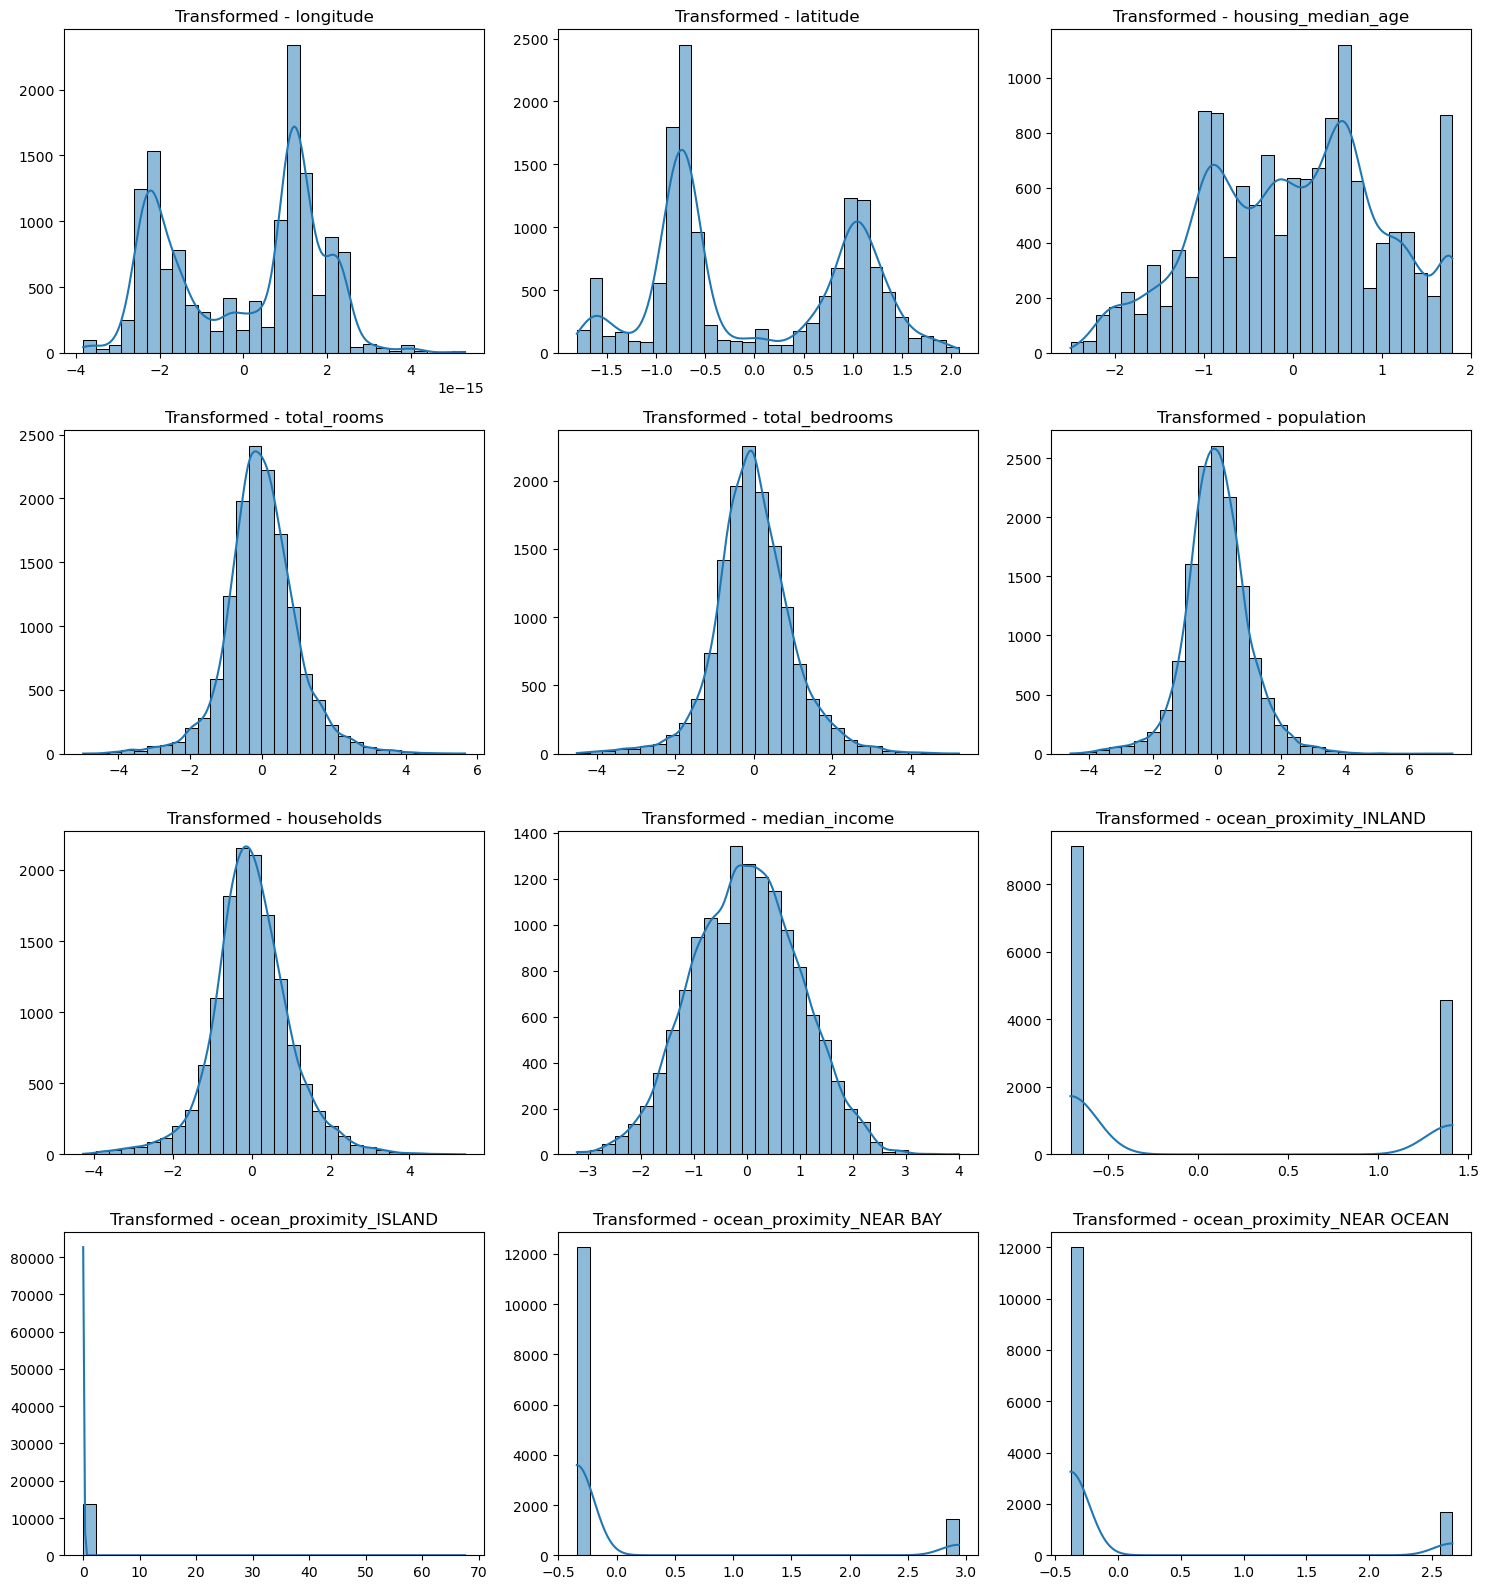

In [35]:
plot_all_histograms(X_train_transformed_df,title_prefix="Transformed -")

In [36]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [37]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_squared = r2_score(true, predicted)

    return mae, rmse, r2_squared

In [38]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}


In [39]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed_df, y_train)

    y_train_pred = model.predict(X_train_transformed_df)
    y_test_pred = model.predict(X_test_transformed_df)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model Performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)

    print("-------------------------------------------")
    
    print("Model Performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-------------------------------------------")
    print("\n")

Linear Regression
Model Performance for Training Set
Root Mean Squared Error:  60991.945008199305
Mean Absolute Error:  45769.21085252108
R2 Score:  0.5889454104754954
-------------------------------------------
Model Performance for Test Set
Root Mean Squared Error:  60382.20869334318
Mean Absolute Error:  45371.657675643124
R2 Score:  0.6055409011640597
-------------------------------------------


Lasso
Model Performance for Training Set
Root Mean Squared Error:  60991.94599646808
Mean Absolute Error:  45769.218332527416
R2 Score:  0.5889453971546408
-------------------------------------------
Model Performance for Test Set
Root Mean Squared Error:  60382.26646644706
Mean Absolute Error:  45371.624481693616
R2 Score:  0.60554014633452
-------------------------------------------


Ridge
Model Performance for Training Set
Root Mean Squared Error:  60991.951721869664
Mean Absolute Error:  45769.136204732014
R2 Score:  0.5889453199820651
-------------------------------------------
Model